In [9]:
import pandas as pd
import os

# Load dataset
if os.path.exists(r'C:\Users\shrey\OneDrive\Desktop\inventory_forcasting\data\inventory_forecasting.csv'):
    df = pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\inventory_forcasting\data\inventory_forecasting.csv')
else:
    print("File not found!")

# Preview
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0096,Toys,West,158,134,142,152.36,40.88,5,Sunny,1,42.39,Winter
1,2022-01-01,S001,P0016,Clothing,East,189,127,125,150.47,90.78,0,Rainy,0,84.16,Winter
2,2022-01-01,S001,P0031,Electronics,West,75,48,39,68.62,13.99,20,Rainy,0,12.67,Winter
3,2022-01-01,S001,P0159,Electronics,West,161,74,71,75.46,84.92,10,Snowy,0,83.03,Winter
4,2022-01-01,S001,P0129,Furniture,South,135,66,69,67.18,19.66,0,Cloudy,0,20.55,Winter


In [10]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109500 entries, 0 to 109499
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                109500 non-null  object 
 1   Store ID            109500 non-null  object 
 2   Product ID          109500 non-null  object 
 3   Category            109500 non-null  object 
 4   Region              109500 non-null  object 
 5   Inventory Level     109500 non-null  int64  
 6   Units Sold          109500 non-null  int64  
 7   Units Ordered       109500 non-null  int64  
 8   Demand Forecast     109500 non-null  float64
 9   Price               109500 non-null  float64
 10  Discount            109500 non-null  int64  
 11  Weather Condition   109500 non-null  object 
 12  Holiday/Promotion   109500 non-null  int64  
 13  Competitor Pricing  109500 non-null  float64
 14  Seasonality         109500 non-null  object 
dtypes: float64(3), int64(5), object(7)

In [11]:
# Summary of numerical and categorical columns
df.describe(include='all')

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
count,109500,109500,109500,109500,109500,109500.000000,109500.000000,109500.000000,109500.000000,109500.000000,109500.000000,109500,109500.00000,109500.000000,109500
unique,730,5,30,5,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4
top,2022-01-01,S001,P0096,Clothing,East,NaN,NaN,NaN,NaN,NaN,NaN,Rainy,NaN,NaN,Winter
freq,150,21900,3650,40150,27559,NaN,NaN,NaN,NaN,NaN,NaN,27589,NaN,NaN,36000
mean,NaN,NaN,NaN,NaN,NaN,145.705954,96.724356,96.302320,108.003150,55.023588,7.517397,NaN,0.15011,55.011232,NaN
std,NaN,NaN,NaN,NaN,NaN,48.301634,36.948147,38.630996,38.319878,25.996368,6.446679,NaN,0.35718,26.217801,NaN
min,NaN,NaN,NaN,NaN,NaN,20.000000,0.000000,20.000000,0.000000,10.000000,0.000000,NaN,0.00000,9.080000,NaN
25%,NaN,NaN,NaN,NaN,NaN,112.000000,71.000000,69.000000,81.960000,32.520000,0.000000,NaN,0.00000,32.400000,NaN
50%,NaN,NaN,NaN,NaN,NaN,143.000000,93.000000,92.000000,105.710000,54.980000,5.000000,NaN,0.00000,54.830000,NaN
75%,NaN,NaN,NaN,NaN,NaN,176.000000,118.000000,119.000000,130.940000,77.620000,10.000000,NaN,0.00000,77.362500,NaN


In [13]:
# Check for missing/null values
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [14]:
# Count of unique values per column
df.nunique()

Date                    730
Store ID                  5
Product ID               30
Category                  5
Region                    4
Inventory Level         363
Units Sold              299
Units Ordered           298
Demand Forecast       18515
Price                  9001
Discount                  5
Weather Condition         4
Holiday/Promotion         2
Competitor Pricing     9896
Seasonality               4
dtype: int64

In [15]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\shrey\AppData\Local\Temp\ipykernel_25852\382320511.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Units Sold', data=df, estimator='sum', ci=None)


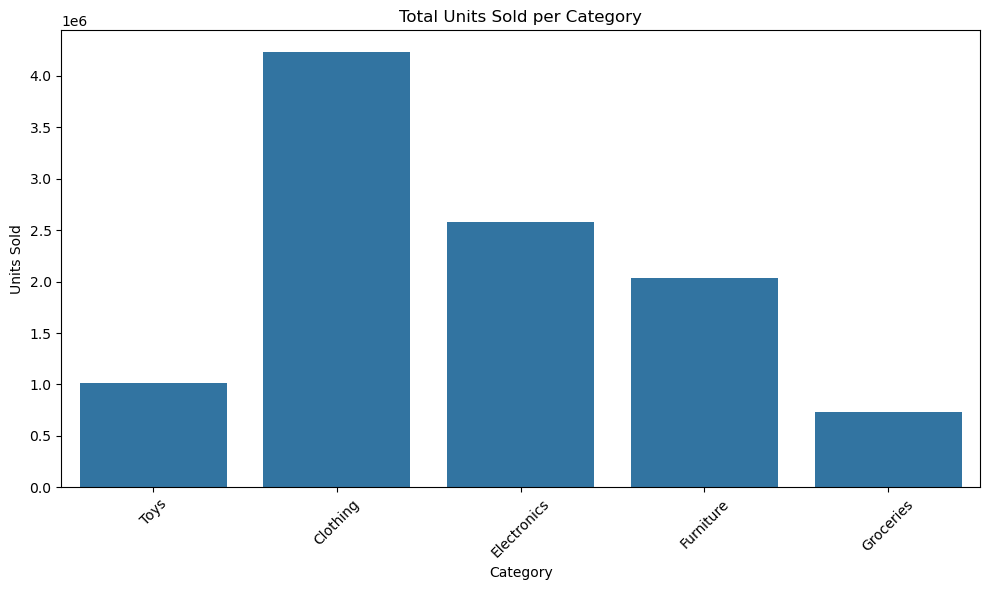

In [ ]:
# Category-wise Sales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Units Sold', data=df, estimator='sum', ci=None)
plt.title('Total Units Sold per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

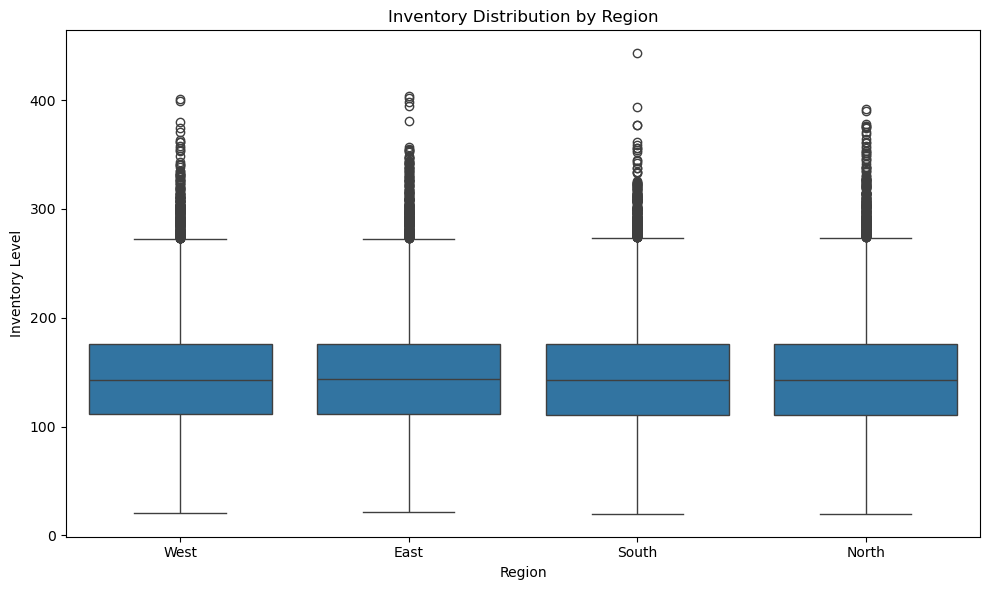

In [17]:
# Region-wise Inventory
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Inventory Level', data=df)
plt.title('Inventory Distribution by Region')
plt.tight_layout()
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_25852\1358837137.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weather Condition', y='Units Sold', data=df, estimator='mean', ci=None)


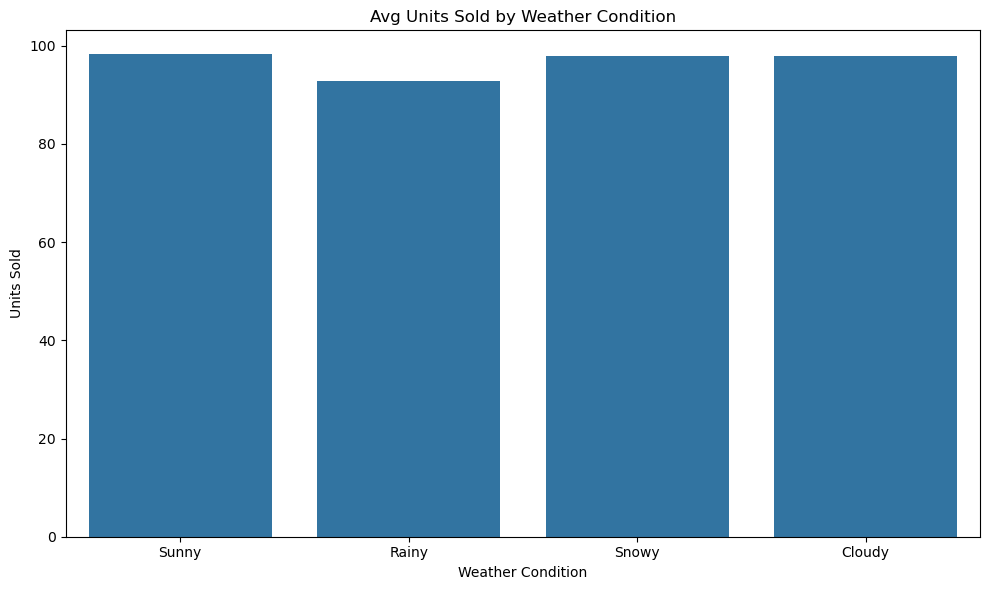

In [ ]:
# Weather Impact on Sales
plt.figure(figsize=(10,6))
sns.barplot(x='Weather Condition', y='Units Sold', data=df, estimator='mean', ci=None)
plt.title('Avg Units Sold by Weather Condition')
plt.tight_layout()
plt.show()

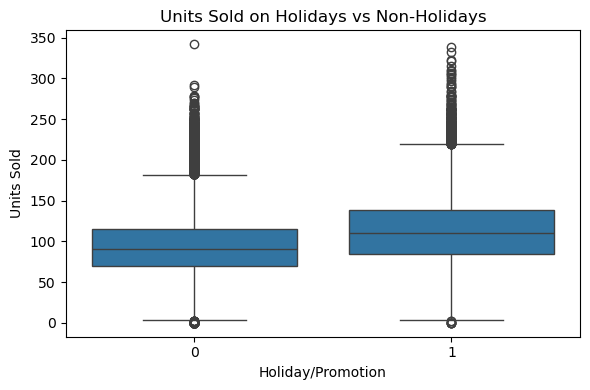

In [21]:
# Holiday/Promotion Effect
plt.figure(figsize=(6,4))
sns.boxplot(x='Holiday/Promotion', y='Units Sold', data=df)
plt.title('Units Sold on Holidays vs Non-Holidays')
plt.tight_layout()
plt.show()

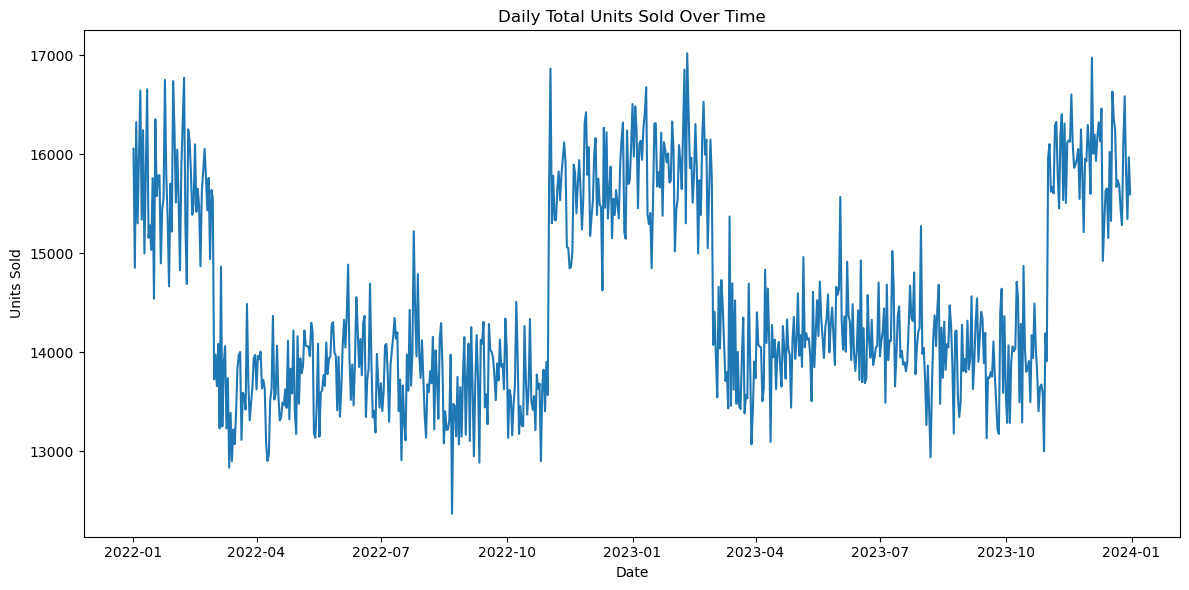

In [ ]:
# Group by Date
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()
# Time Series Trend
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Units Sold', data=daily_sales)
plt.title('Daily Total Units Sold Over Time')
plt.tight_layout()
plt.show()

In [22]:
new_df=df.head(2500)

In [23]:
new_df.to_csv(r'C:\Users\shrey\OneDrive\Desktop\inventory_forcasting\data\perplexity.csv')